In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **Get the data**

In [0]:
fraud_data= pd.read_csv('Data/Fraud_Data.csv')
ip_country=pd.read_csv('Data/IpAddress_to_Country.csv')

In [0]:
# Define a function to draw a bar chart of a specific feature in data
def barchart(feature):
    frau=fraud_data[fraud_data['class']==1][feature].value_counts()
    df=pd.DataFrame([frau])
    df.index=['frau']
    df.plot(kind='bar')

In [152]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


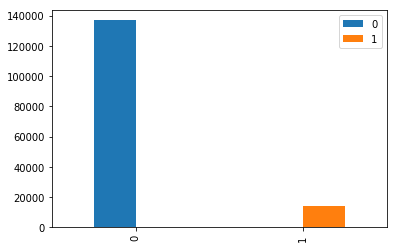

In [154]:
# plot the number of two kinds of class so that we can see this data is imbalance
fraud=fraud_data[fraud_data['class']==1]['class'].value_counts()
not_fraud=fraud_data[fraud_data['class']==0]['class'].value_counts()
df=pd.DataFrame([ not_fraud, fraud])
df.index=['0','1']
df.plot(kind='bar')

### Time Processing


_ First, convert all the cells in colums 'purchase_time' and 'signup_time' into time series so that we can easily process this fearure

_ Minus two columns and pass it to columns ' difference' because, the transactions which are fraud usually have the small difference between  'purchase_time'  and  'signup_time'

_ Get the specific day of week base on ' 'purchase_time'

_ Encode the categorical values into numerical values

In [0]:
# Convert to date time type
fraud_data['purchase_time']=pd.to_datetime(fraud_data['purchase_time'], errors='coerce')
fraud_data['signup_time']=pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['difference']=fraud_data['purchase_time']-fraud_data['signup_time']
fraud_data['difference']=fraud_data['difference'].astype('timedelta64[m]')

In [0]:
# Only get the hours from singup time and purchase time
fraud_data['signup_hour']=fraud_data['signup_time'].dt.hour
fraud_data['purchase_hour']=fraud_data['purchase_time'].dt.hour

In [0]:
# Get the day of week
fraud_data['purchase_dayofweek']=fraud_data['purchase_time'].dt.strftime('%A')

In [0]:
#Encode the categorical values into numerical values
fraud_data['purchase_dayofweek'], key_dayofweek=fraud_data['purchase_dayofweek'].factorize(sort=True)

### User_id and Device_id

_ Encode 'device_id' to numerical value

_ Define two new colums 'usage_device_count' and 'usage_ip_count' which are the counts  device used and ip used

In [0]:
# Endcode this fearture
fraud_data['device_id'], key_device=fraud_data['device_id'].factorize(sort=True)

#Define two new columns
u, indices, counts=np.unique(fraud_data['device_id'], return_inverse=True, return_counts=True)
fraud_data['usage_device_count']= counts[indices]
u, indices, counts=np.unique(fraud_data['ip_address'], return_inverse=True, return_counts=True)
fraud_data['usage_ip_count']= counts[indices]

### Sex

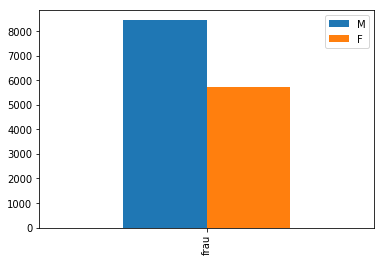

In [75]:
barchart('sex')

In [0]:
#Encode this fearture
fraud_data['sex'], key_sex=fraud_data['sex'].factorize(sort=True)

### Source

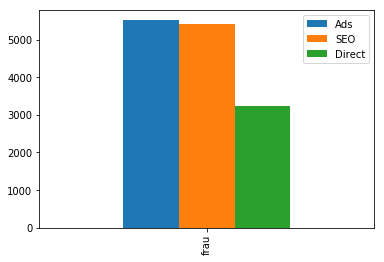

In [77]:
barchart('source')

In [0]:
#Encode this fearture
fraud_data['source'], key_source=fraud_data['source'].factorize(sort=True)

### Brower

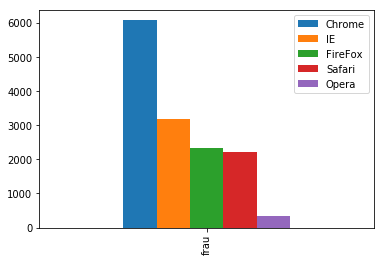

In [79]:
barchart('browser')

In [0]:
#Encode this fearture
fraud_data['browser'], key_browser=fraud_data['browser'].factorize(sort=True)

###  IP Adress

_ First we find the country of every single ip address by mapping the ip into the 'ip_country' dataframe 

_ Encode the country columns to numerical number

In [0]:
# Function to map
def map_ip_address(i):
    result=ip_country[(ip_country['lower_bound_ip_address'].le(i))&
                     (ip_country['upper_bound_ip_address'].ge(i))]['country'].values
    if result.shape[0] >0:
        return result[0]
    else:
        return np.NaN

In [0]:
# Mapping
fraud_data['country']=fraud_data['ip_address'].map(map_ip_address)

In [0]:
#Encode
fraud_data['country'], key=fraud_data['country'].factorize(sort=True)

### Correlation

_ See the correlation betweem every singel feature to each other

In [0]:
import seaborn as sns

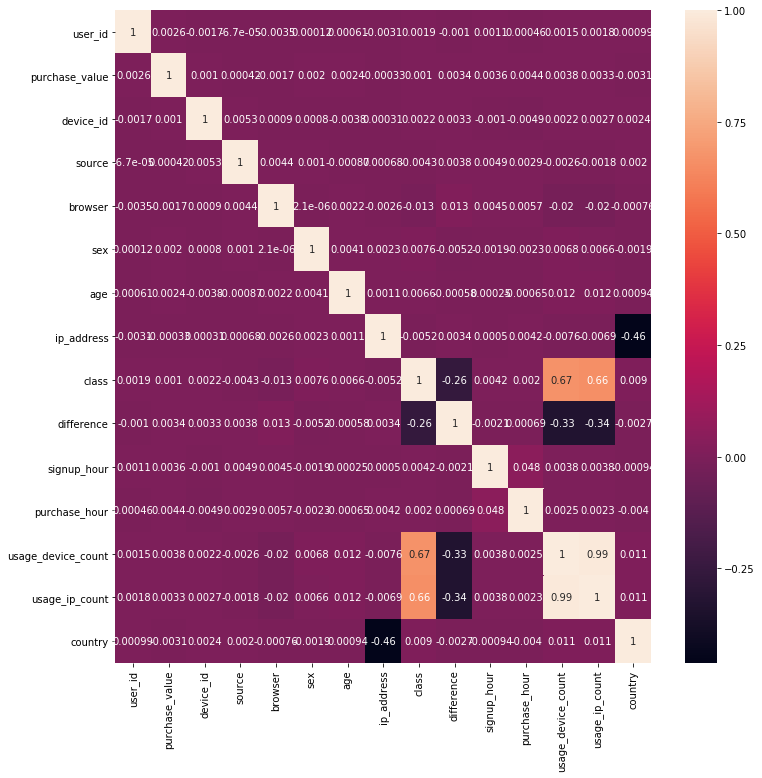

In [86]:
plt.figure(figsize=(12,12))
sns.heatmap(fraud_data.corr(),annot=True)

In [0]:
# Drop the feautures which are not neccessary
fraud_data=fraud_data.drop(['user_id','signup_time','purchase_time'], axis=1)

In [95]:
# After processing, the data looks like this
fraud_data.head()

,purchase_value,device_id,source,browser,sex,age,ip_address,class,difference,signup_hour,purchase_hour,purchase_dayofweek,usage_device_count,usage_ip_count,country
0,34,89215,2,0,1,39,7.327584e+08,0,75111.0,22,2,2,1,1,85
1,16,24078,0,0,0,53,3.503114e+08,0,299.0,20,1,1,1,1,172
2,15,131216,2,3,1,53,2.621474e+09,1,0.0,18,18,4,12,12,172
3,44,3977,2,4,1,41,3.840542e+09,0,8201.0,21,13,1,1,1,0
4,39,68757,0,4,1,45,4.155831e+08,0,72691.0,7,18,6,1,1,172


In [0]:
fraud_data.to_csv('Data/data_after_process.csv')

# **Training data**

### **Split Data**

In [0]:
#Split data
from sklearn.model_selection import train_test_split

X=fraud_data.drop(['class'], axis=1)
y=fraud_data['class']
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.3)

### **Train data**

In [138]:
# Fit the data using 3 machine learning model K neigbour, Random Forest and Decision Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

knn_clf=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree', weights='distance')
knn_clf.fit(X_train, y_train)




rf_clf=RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)


dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


KNN score 0.9402655843296422


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Rf score 0.9561477037102396
dt score 0.9128689283981118


In [0]:
# Evaluate every algorithms to find out the best one
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True, random_state=0)

In [134]:
# This is the best one which has the best results
# The only thing we need to take care is : This is the imbalance data, so we can not use the normal metric to evaluate
# We use 'roc_auc' to evaluate the model
rf_clf=RandomForestClassifier(class_weight='balanced')
score=cross_val_score(rf_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
print(np.mean(score)*100,2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

82.80368829307004 2


In [135]:
knn_clf=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree', weights='distance')
score=cross_val_score(knn_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
print(np.mean(score)*100,2)


76.59778105979773 2


In [136]:
dt_clf=DecisionTreeClassifier()
score=cross_val_score(dt_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
print(np.mean(score)*100,2)

77.16424017047265 2


In [0]:
# Find the auc of every model and plot it
from sklearn.metrics import roc_curve, auc


y_pred_rf=rf_clf.predict(X_test)
y_pred_prob_rf=rf_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, y_pred_prob_rf[:,1])
auc_rf=auc(fpr_rf, tpr_rf)

y_pred_knn=knn_clf.predict(X_test)
y_pred_prob_knn=knn_clf.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds_knn= roc_curve(y_test, y_pred_prob_knn[:,1])
auc_knn=auc(fpr_knn, tpr_knn)

y_pred_dt=dt_clf.predict(X_test)
y_pred_prob_dt=dt_clf.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt= roc_curve(y_test, y_pred_prob_dt[:,1])
auc_dt=auc(fpr_dt, tpr_dt)


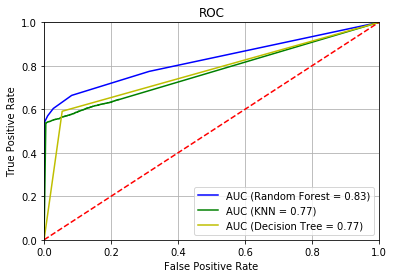

In [149]:
# Plot the ROC of each model, we also see the ROC is the best model from the graph
plt.title('ROC')
plt.plot(fpr_rf, tpr_rf,'b', label='AUC (Random Forest = %0.2f)' % auc_rf)
plt.plot(fpr_knn, tpr_knn,'g', label='AUC (KNN = %0.2f)' % auc_knn)
plt.plot(fpr_dt, tpr_dt,'y', label='AUC (Decision Tree = %0.2f)' % auc_dt)
plt.legend()
plt.grid()
plt.plot([0.0, 1.0],[0.0, 1.0],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()